# FSS Validation Graphs

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [19]:
df_uvv = pd.read_csv('/home/scratch/jcorner1/syn_sev/dataframes/FSS/FSS_UVV_dataframe.csv')
df_dvv = pd.read_csv('/home/scratch/jcorner1/syn_sev/dataframes/FSS/FSS_DVV_dataframe.csv')
df_uh = pd.read_csv('/home/scratch/jcorner1/syn_sev/dataframes/FSS/FSS_UH_dataframe.csv')

### Create FSS Plots

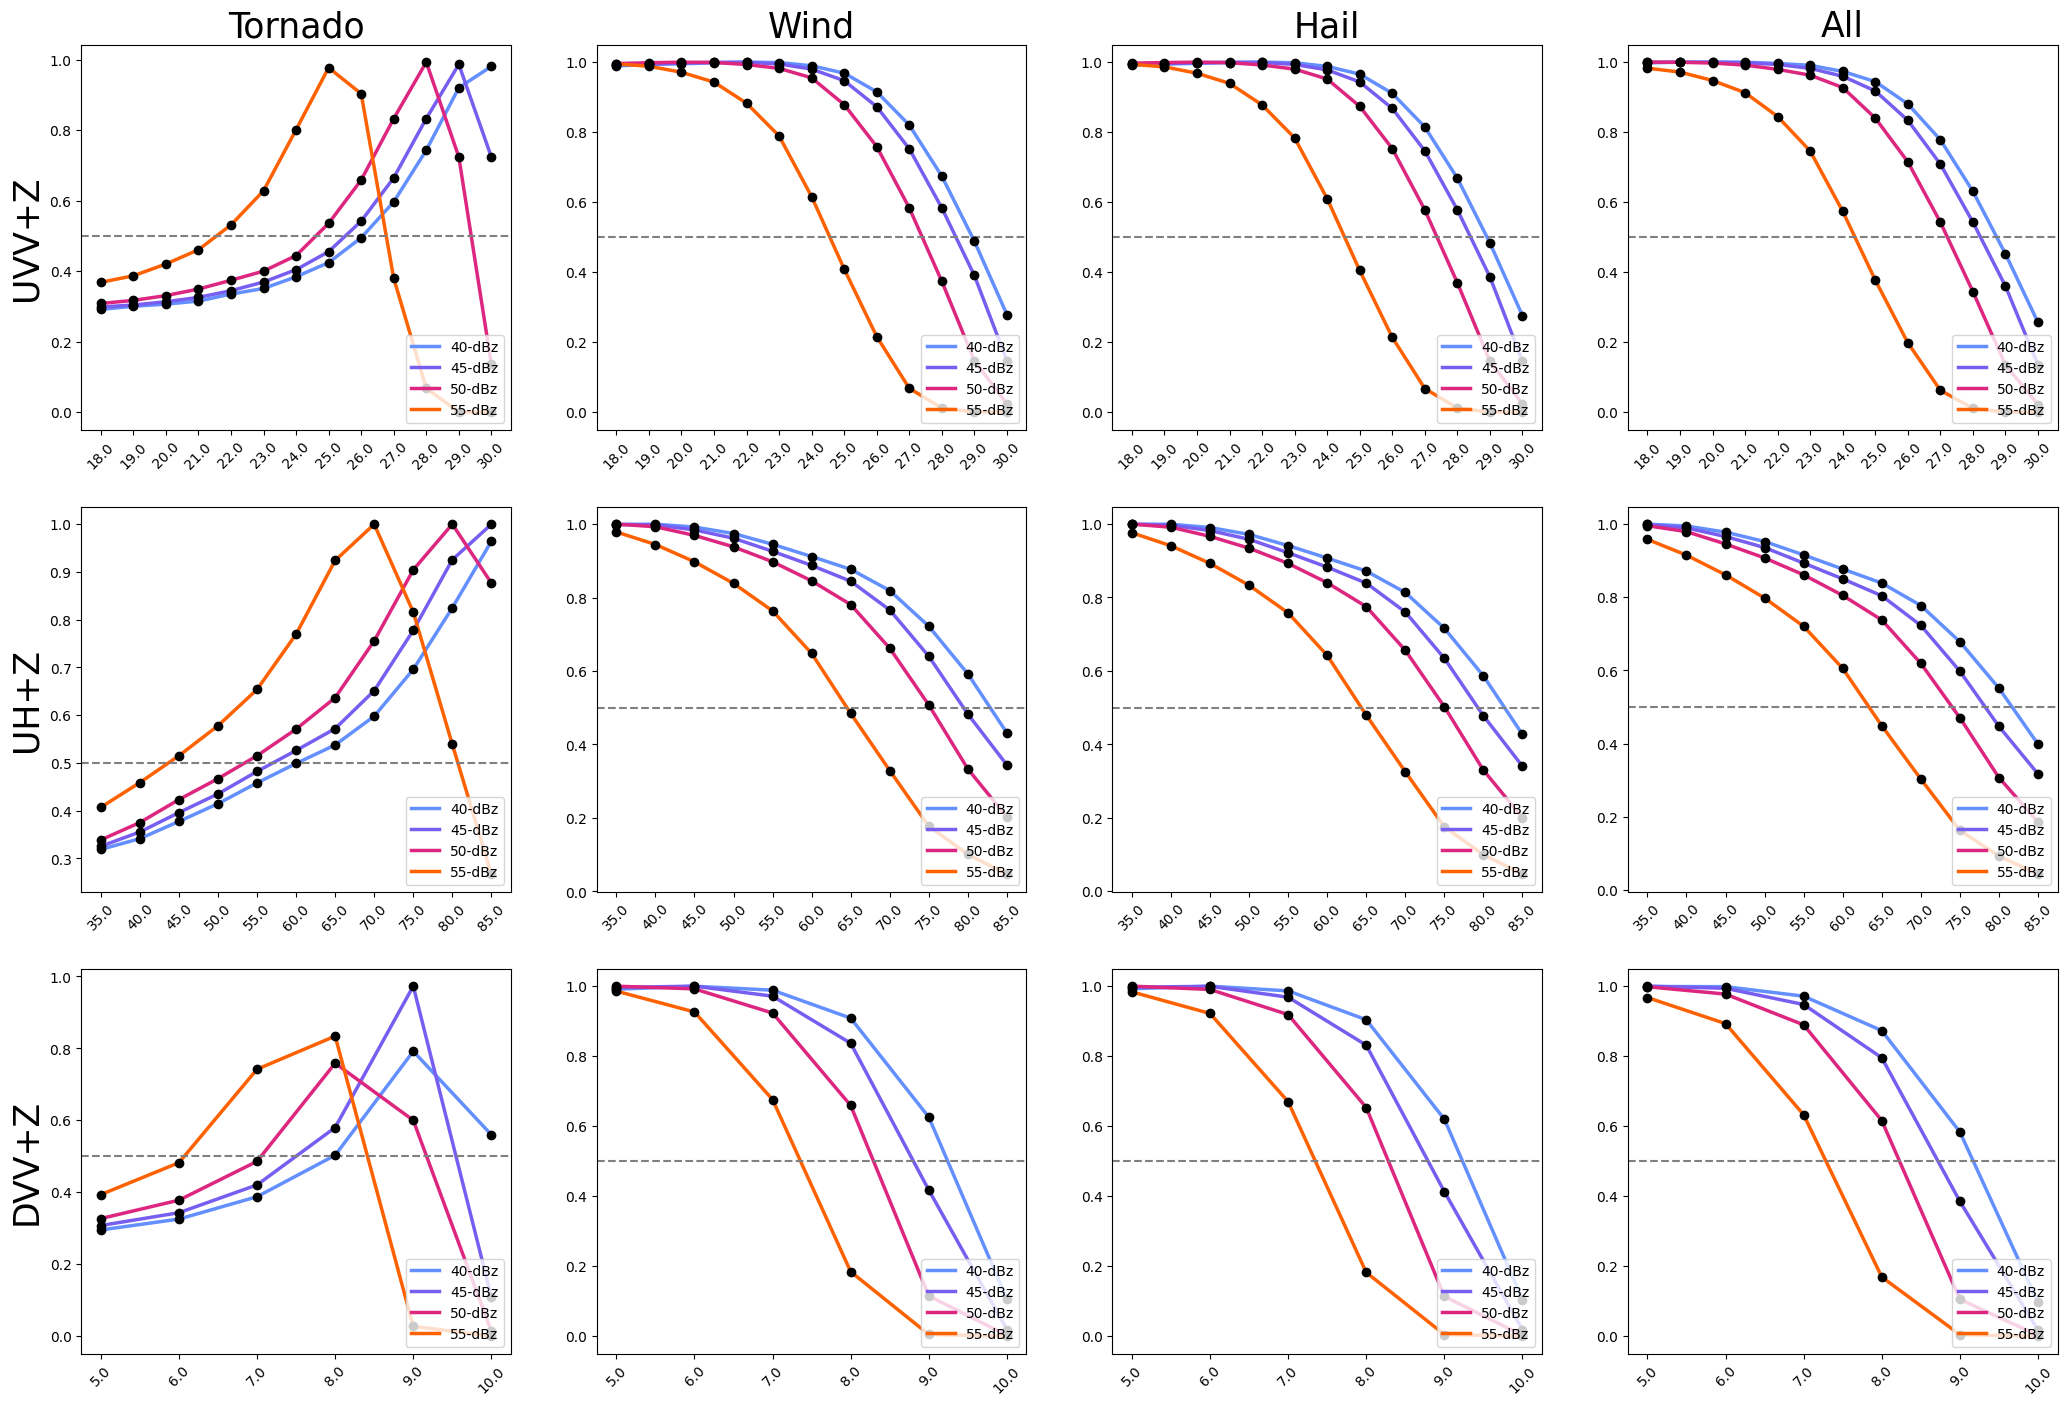

In [50]:
hazs = ['tor', 'wind', 'hail', 'all']
hazards = ['Tornado', 'Wind', 'Hail', 'All']

surs = ['uvv', 'uh', 'dvv']
surrogates = ['UVV', 'UH', 'DVV']

refc = [40, 45, 50, 55]
colors = ["#648FFF", "#785EF0", "#DC267F", "#FE6100"]

plt.figure(figsize=(25.5,17))
j = 1

#iterate through the hazards and surrogates
for sur in range(len(surs)):
    for haz in range(len(hazs)):
    
        #iterate through vars
        ax = plt.subplot(3,4,j)
        
        #iterate through each reflectivty value
        for i in range(len(refc)):
            df = locals()[f'df_{surs[sur]}'][(locals()[f'df_{surs[sur]}']['DBZ'] == refc[i])]
            plt.plot(np.array(df[f'DVV'].values, dtype=float), df[f'FSS_{hazs[haz]}'].values, lw=2.5, color = colors[i])
            plt.xticks(np.array(df[f'DVV'].values, dtype=float), labels = np.array(df[f'DVV'].values, dtype=float), rotation=45)
            plt.legend([x + '-dBz' for x in list(map(str, np.arange(40, 56, 5)))], loc ='lower right').set_zorder(12)

        plt.axhline(y = 0.5, color = 'grey', ls='--')
        
        if j <= 4:
            plt.title(f'{hazards[haz]}',fontsize=25)
            
        if j in [1, 5, 9, 13]:
             plt.ylabel(f'{surrogates[sur]}+Z',fontsize=25)
            
        for i in range(len(refc)):
            df = locals()[f'df_{surs[sur]}'][(locals()[f'df_{surs[sur]}']['DBZ'] == refc[i])]
            plt.scatter(np.array(df[f'DVV'].values, dtype=float), df[f'FSS_{hazs[haz]}'].values, color = 'black', zorder=10)
        
        j = j + 1
plt.savefig('../Plots/FSS_plots.jpg', format='jpg', dpi=500, bbox_inches='tight')